(506, 14)
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object
<bound method NDFrame.head of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.

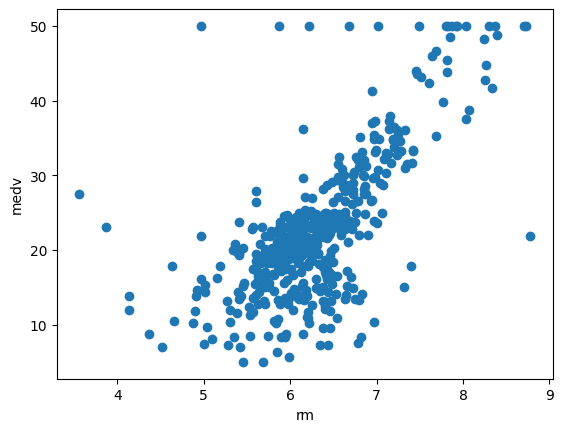

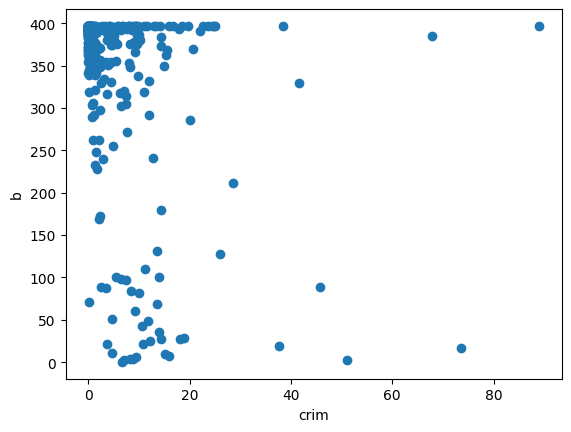

         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
478  10.23300   0.0  18.10     0  0.614  6.185  96.7  2.1705   24  666   
26    0.67191   0.0   8.14     0  0.538  5.813  90.3  4.6820    4  307   
7     0.14455  12.5   7.87     0  0.524  6.172  96.1  5.9505    5  311   
492   0.11132   0.0  27.74     0  0.609  5.983  83.5  2.1099    4  711   
108   0.12802   0.0   8.56     0  0.520  6.474  97.1  2.4329    5  384   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
106   0.17120   0.0   8.56     0  0.520  5.836  91.9  2.2110    5  384   
270   0.29916  20.0   6.96     0  0.464  5.856  42.1  4.4290    3  223   
348   0.01501  80.0   2.01     0  0.435  6.635  29.7  8.3440    4  280   
435  11.16040   0.0  18.10     0  0.740  6.629  94.6  2.1247   24  666   
102   0.22876   0.0   8.56     0  0.520  6.405  85.4  2.7147    5  384   

     ptratio       b  lstat  
478     20.2  379.70  18.03  
26      21.0  376.88  14.81  
7       15.2  396.90 

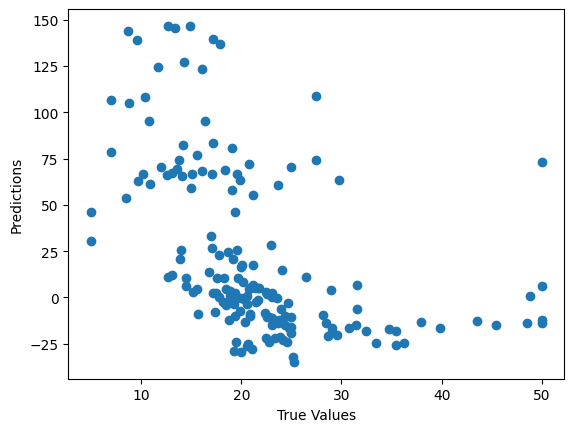

[[363.83369237]
 [ 72.92068562]
 [377.18071776]
 [154.89564593]
 [105.27837807]
 [394.39313972]
 [377.99397426]
 [125.03565208]
 [ 70.44842759]
 [449.41488563]
 [ 10.16311354]
 [194.10150302]
 [407.02181128]
 [ 83.41711175]
 [371.705006  ]
 [388.76216516]
 [495.70877684]
 [ 31.71161347]
 [316.09401804]
 [408.34946062]
 [490.90407654]
 [491.55877183]
 [280.47316281]
 [355.15257122]
 [ 77.07444509]
 [460.02162626]
 [498.15695626]
 [210.92485858]
 [102.77500646]
 [334.16737159]
 [474.76945059]
 [337.78573745]
 [440.34509963]
 [174.6470822 ]
 [  3.55463158]
 [333.74221573]
 [409.05917369]
 [ 70.54206808]
 [210.33299061]
 [ 62.33003604]
 [384.65921629]
 [ 94.82944114]
 [485.71582014]
 [185.73868976]
 [ 32.82327945]
 [ 77.73797904]
 [  1.26695545]
 [ 13.2926891 ]
 [416.02854883]
 [ 20.92619491]
 [ 73.21041072]
 [182.23862287]
 [133.21200552]
 [410.43979206]
 [192.65556415]
 [ 55.08903178]
 [147.7864898 ]
 [ 19.51105818]
 [204.21310535]
 [ 77.34077014]
 [494.35612003]
 [261.41021625]
 [323.59

In [ ]:
from keras import layers
from keras import utils
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn import linear_model

from sklearn.model_selection import train_test_split

# Boston housing features


columns = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

boston_data = pd.read_csv('/content/sample_data/boston_housing.csv', names=columns)

# show dimension, datatype, and first 5 rows of boston_data. # use shape, dtypes, head
print(boston_data.shape)

print(boston_data.dtypes)

print(boston_data.head)

# show correlation between attributes

boston_corr_var = boston_data.corr()
print(boston_corr_var)

# use corr with pearson

boston_data.keys()

print(st.pearsonr(boston_data.rm,boston_data.age))

# for each attribute, show mean, count, std, min, max, etc

boston_data.describe()

# Visualization
# We want to show the relationship between ‘rm’ attribute and ‘medv’(target) attribute
# define x_val and y_val from boston_data

x_val = boston_data.rm
y_val = boston_data.medv

plt.scatter(x_val, y_val)
plt.xlabel('rm')
plt.ylabel('medv')
plt.show()

# choose another attribute and draw similar graph as above

a_val = boston_data.crim
b_val = boston_data.b

plt.scatter(a_val, b_val)
plt.xlabel('crim')
plt.ylabel('b')
plt.show()

Y = boston_data.pop('medv') # select target attribute
X = boston_data

# split X, Y into X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

print(X_train)

print(Y_train)

# Show that split is correctly done
# you can show the shape of each data & first 5 rows of each data

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

print(X_train.head())
print(Y_train.head())
print(X_test.head())
print(Y_test.head())


# MSE linear regression model in Keras
# We don't specify anything for activation -> no activation is applied # (ie. "linear" activation: a(x) = x)
model = Sequential()
model.add(Dense(1, input_dim=13))

# you can change optimizer or loss function, if you want
# use adam as an optimizer and mse(mean squared error) as the error function
model.compile(optimizer='adam', loss='mse')

# train linear regression model
# you can change the values of batch_size and epochs
model.fit(X_train, Y_train, batch_size=16, epochs=10, validation_data=(X_test, Y_test))



# show the structure of network model.summary()

model.summary()

# show the coefficients of linear regression
print(model.layers[0].get_weights()[0])
print(model.layers[0].get_weights()[1])

# show the error value

model.evaluate(X_train,Y_train)


Y_predictions = model.predict(X_test)
print('prediction: ', Y_predictions.flatten())
print('Y_test: ', Y_test)

# show the relationalship between label and predictions

plt.scatter(Y_test, Y_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


# Using a certain input data, compute the linear regression output

var1 = np.arange(1,501)
var2 = var1 + np.random.normal(size=500,loc=0,scale=1)

data_frame_1 = pd.DataFrame(data=var1)
data_frame_2 = pd.DataFrame(data=var2)

reg = linear_model.LinearRegression()

var1_train,var1_test,var2_train,var2_test = train_test_split(data_frame_1,data_frame_2,test_size=0.33,random_state=42)

reg.fit(var1_train,var2_train)

var1_pred = reg.predict(var2_test)
print(var1_pred)

print(var1_test)



